In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
import importlib

In [12]:
# Import module
import LF2SFR
importlib.reload(LF2SFR)

<module 'LF2SFR' from '/Users/adeliegorce/OneDrive - Imperial College London/PhD/Reio_tools/tools4reionisation/star_formation_history/LF2SFR.py'>

In [13]:
#Schechter parameters from Bouwnes+2015 arXiv:1403.4295 (table 6)
redshifts=[3.8,4.9,5.9,6.8,7.9,10.4]
Mstar = [-20.88,-21.17, -20.94,-20.87, -20.63, -20.92]
phi_star = [1.97e-3,0.74e-3,0.50e-3,0.29e-3,0.21e-3,0.008e-3]
alpha = [-1.64,-1.76,-1.87,-2.06, -2.02, -2.27]

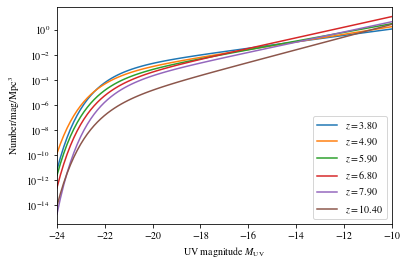

In [14]:
M=np.linspace(-24,-10,100)
plt.figure()
for i,z in enumerate(redshifts):
    plt.semilogy(M,LF2SFR.Schechter_LF(M,z,phi_star[i],Mstar[i],alpha[i]),label=r'$z=%.2f$' %(z))
plt.xlim(-24,-10) 
plt.xlabel(r'UV magnitude $M_\mathrm{UV}$')
plt.ylabel(r'Number/mag/Mpc$^3$')
plt.legend()

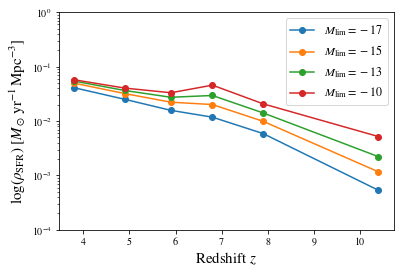

In [15]:
Mlims=[-17,-15,-13,-10]
plt.figure()
rho = np.zeros(len(redshifts))
for u,Mlim in enumerate(Mlims):
    for i,z in enumerate(redshifts):
        rho[i]=LF2SFR.SFR_density(M,z,Mlim,phi_star[i],Mstar[i],alpha[i])
    plt.semilogy(redshifts,rho,marker='o',label=r'$M_\mathrm{lim}=%i$' %(Mlim))
plt.xlabel(r'Redshift $z$',fontsize=15)
plt.ylabel(r'$\mathrm{log}(\rho_\mathrm{SFR})\ [M_\odot \, \mathrm{yr}^{-1}\, \mathrm{Mpc}^{-3}]$',fontsize=15)
plt.ylim(1e-4,1e0)
plt.legend(fontsize=12)

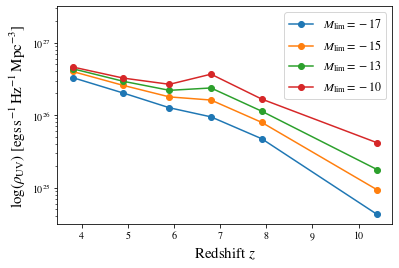

In [17]:
Mlims=[-17,-15,-13,-10]
plt.figure()
UV = np.zeros(len(redshifts))
for u,Mlim in enumerate(Mlims):
    for i,z in enumerate(redshifts):
        rho[i]=LF2SFR.UV_density(M,z,Mlim,phi_star[i],Mstar[i],alpha[i])
    plt.semilogy(redshifts,rho,marker='o',label=r'$M_\mathrm{lim}=%i$' %(Mlim))
plt.xlabel(r'Redshift $z$',fontsize=15)
plt.ylabel(r'$\mathrm{log}(\rho_\mathrm{UV})\ [\mathrm{egs} \, \mathrm{s}^{-1}\, \mathrm{Hz}^{-1}\, \mathrm{Mpc}^{-3}]$',fontsize=15)
plt.ylim(10**(24.5),10**(27.5))
plt.legend(fontsize=12)